In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv("training_data_modified.csv", index_col = 0)
test_data = pd.read_csv("test_data_modified.csv", index_col = 0)

In [3]:
def corr_heatmap(dataset):
    plt.figure(figsize=(30,30))
    plt.rcParams["axes.labelsize"] = 20 #correlation matrix
    sns.set(font_scale=1.4)
    sns.heatmap(dataset.corr('pearson'), annot = True ,linewidths=.1)
    plt.show()

In [4]:
def find_correlation(data, threshold=0.95): #removing correlated rows > 0.95
    corr_mat = data.corr( 'pearson')
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [5]:
training_x = training_data.drop('NEXT_MONTH_DEFAULT', 1)
data_comp = training_x.append(test_data)

In [6]:
due_amount_features = [ 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
                       'DUE_AMT_NOV', 'DUE_AMT_DEC']
pay_amount_features = ['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
paid_amount_features = ['PAID_AMT_JULY','PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT',
                        'PAID_AMT_NOV', 'PAID_AMT_DEC']

for i in range(6):
    month = pay_amount_features[i].split("_")[-1]
    data_comp["Ability_to_pay_" + month] =  data_comp[due_amount_features[i]] * (-1) 
    data_comp["Ability_to_pay_" + month] -= data_comp[pay_amount_features[i]] * data_comp[paid_amount_features[i]]

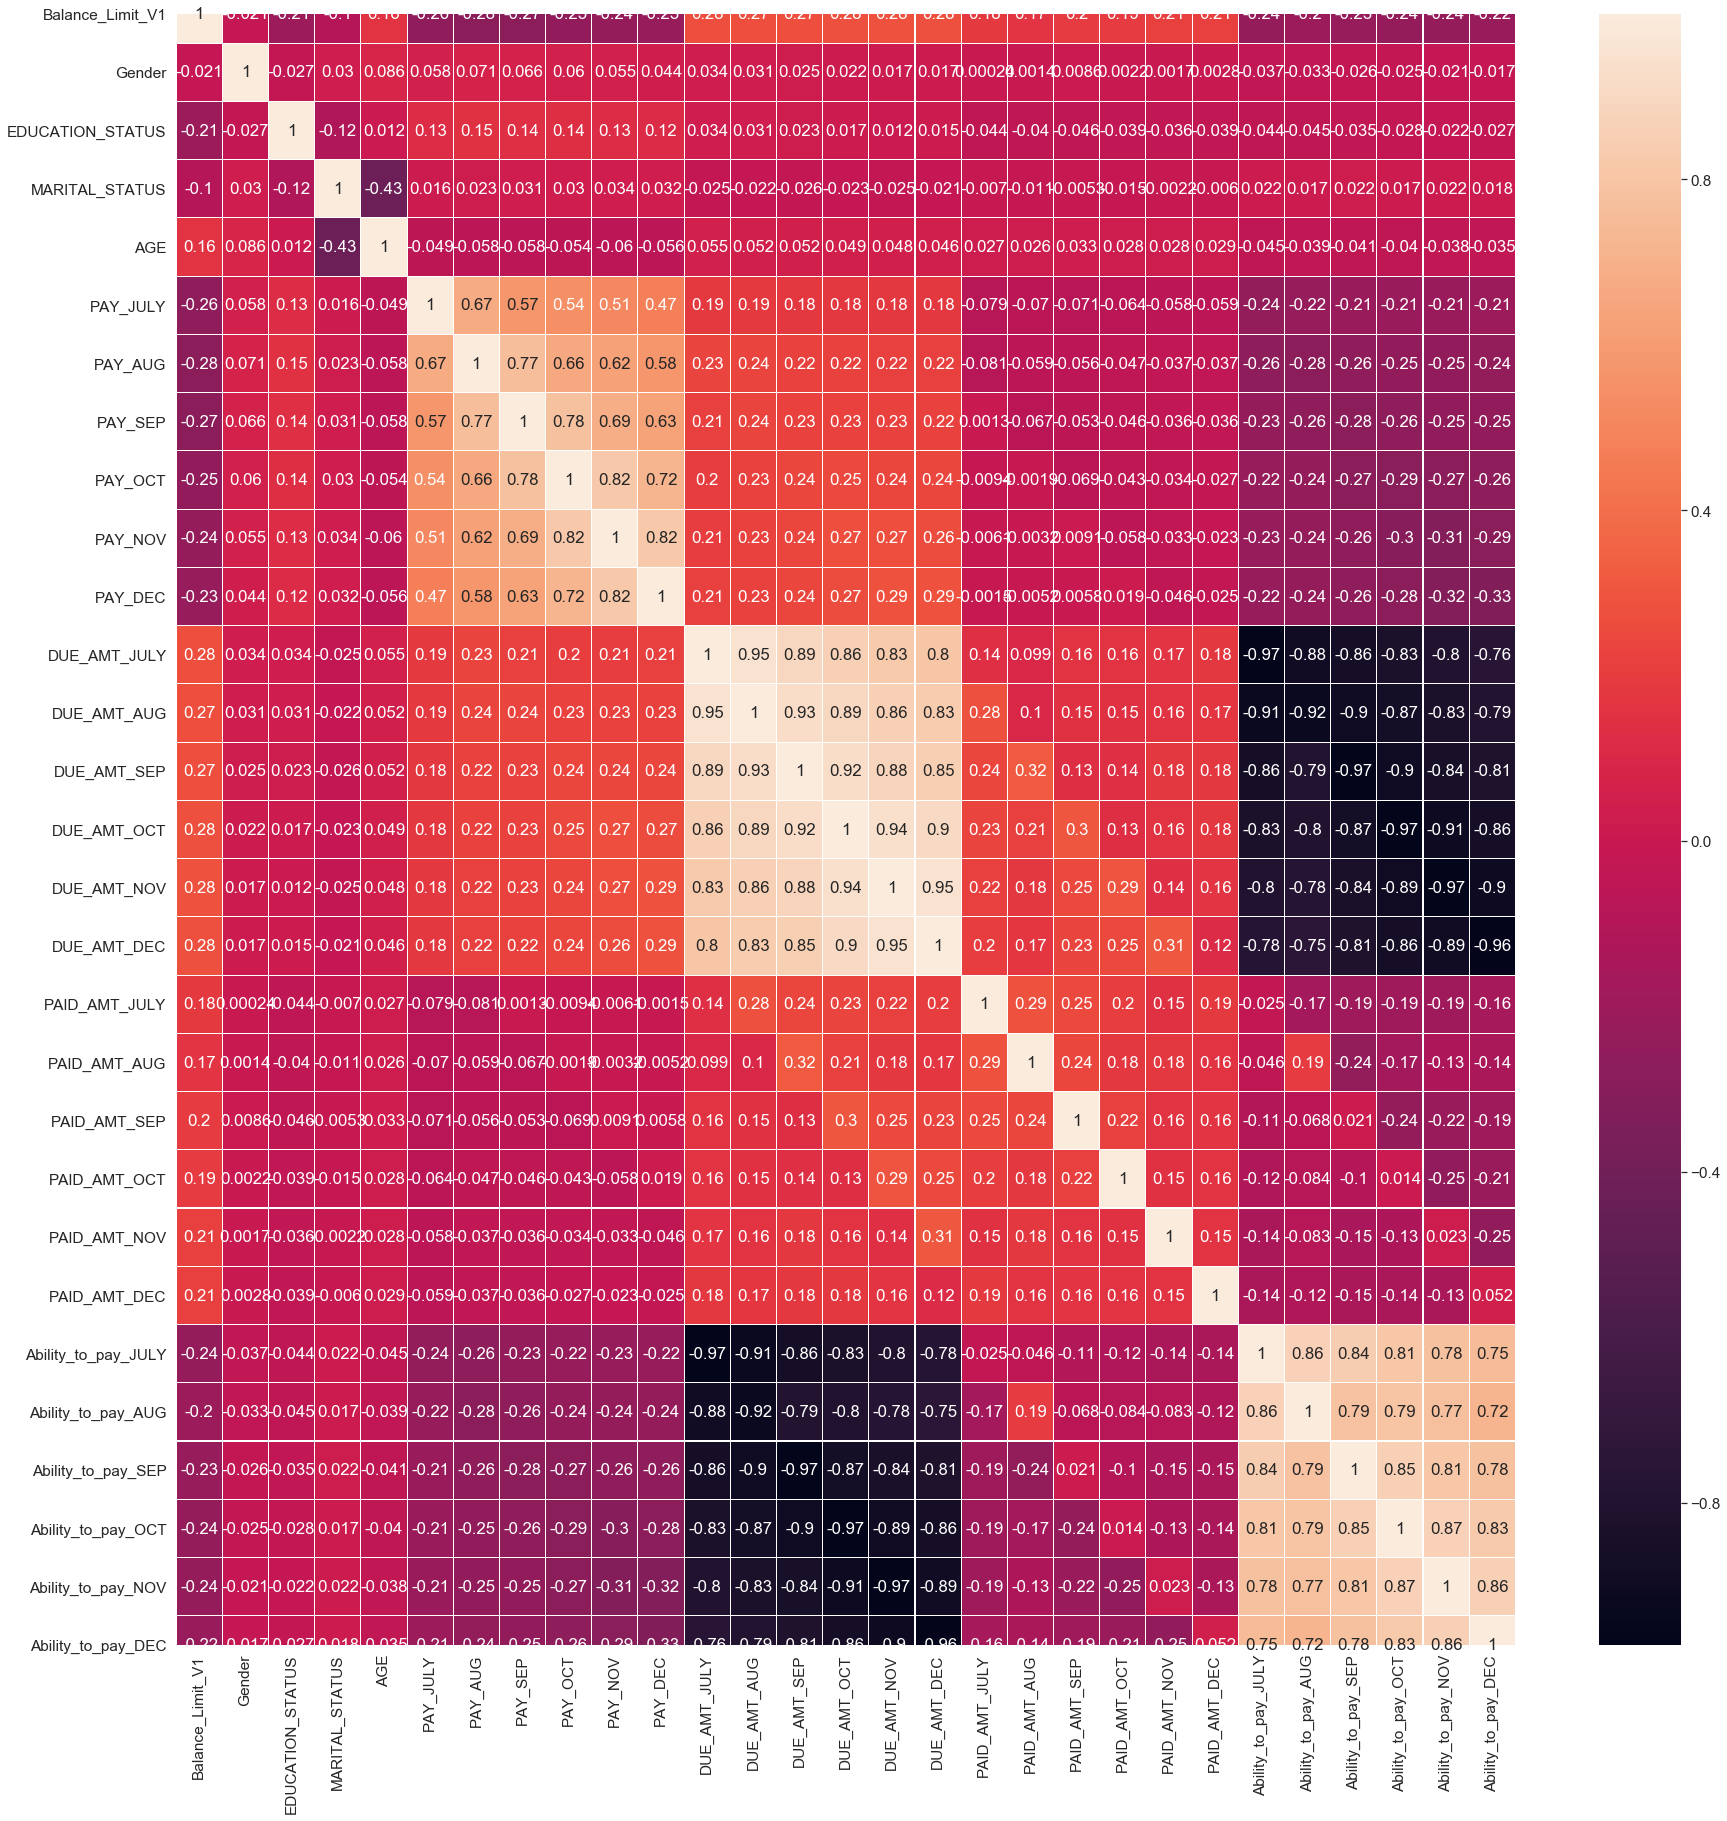

In [7]:
corr_heatmap(data_comp)

In [8]:
find_correlation(data_comp)

['Ability_to_pay_JULY',
 'DUE_AMT_JULY',
 'DUE_AMT_SEP',
 'DUE_AMT_OCT',
 'DUE_AMT_NOV',
 'DUE_AMT_DEC']

In [9]:
due_amount_features = [ 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
                       'DUE_AMT_NOV', 'DUE_AMT_DEC']
pay_amount_features = ['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
paid_amount_features = ['PAID_AMT_JULY','PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT',
                        'PAID_AMT_NOV', 'PAID_AMT_DEC']

In [10]:
def average_column(dataset,avg_col_name,list_col):
    dataset[avg_col_name] = dataset[list_col[0]]
    for i in range(1,len(list_col)):
        dataset[avg_col_name] += dataset[list_col[i]]
    dataset[avg_col_name] /= len(list_col)

In [11]:
average_column(data_comp,"AVG_DUE_AMT",due_amount_features)
average_column(data_comp,"AVG_PAID_AMT",paid_amount_features)

['Ability_to_pay_JULY', 'DUE_AMT_JULY', 'AVG_DUE_AMT', 'DUE_AMT_SEP', 'AVG_DUE_AMT', 'DUE_AMT_OCT', 'AVG_DUE_AMT', 'DUE_AMT_NOV', 'DUE_AMT_DEC']


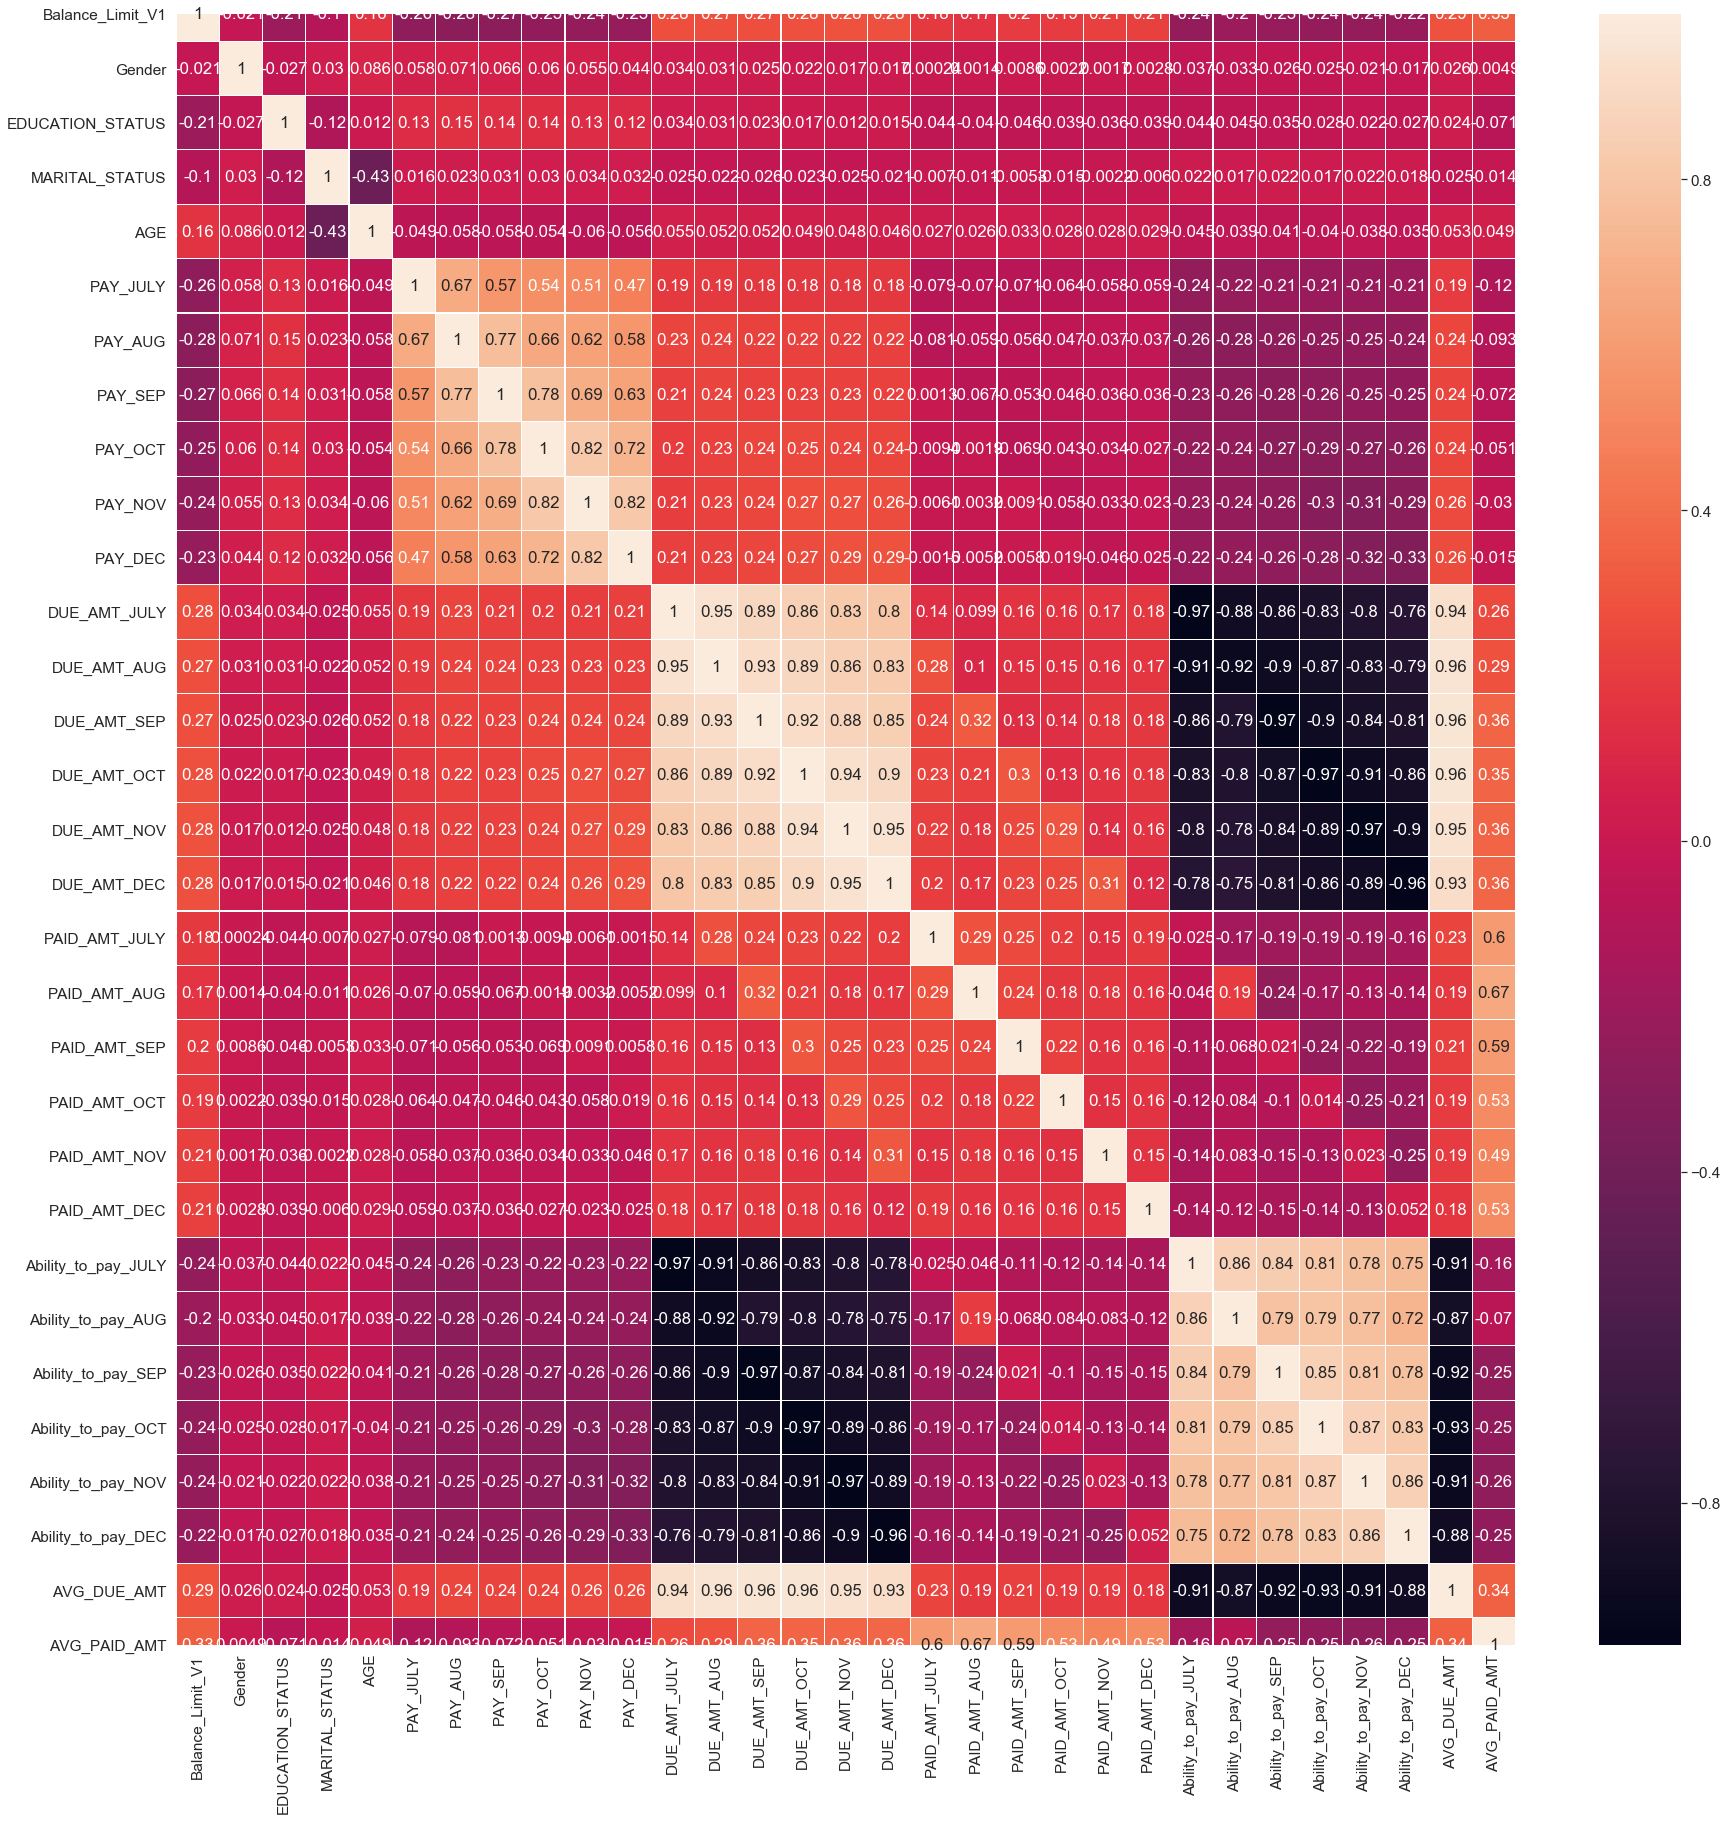

In [13]:
print(find_correlation(data_comp))
corr_heatmap(data_comp)

AVG_DUE_AMT have correlation but AVG PAID AMOUNT have a lower but positive correlation. In realife AVG_PAID_AMOUNT might represent the monthly income of a person. I think that would be beneficial in prediction the whether the person going to default or not in the next month

In [14]:
data_comp = data_comp.drop(find_correlation(data_comp),1)

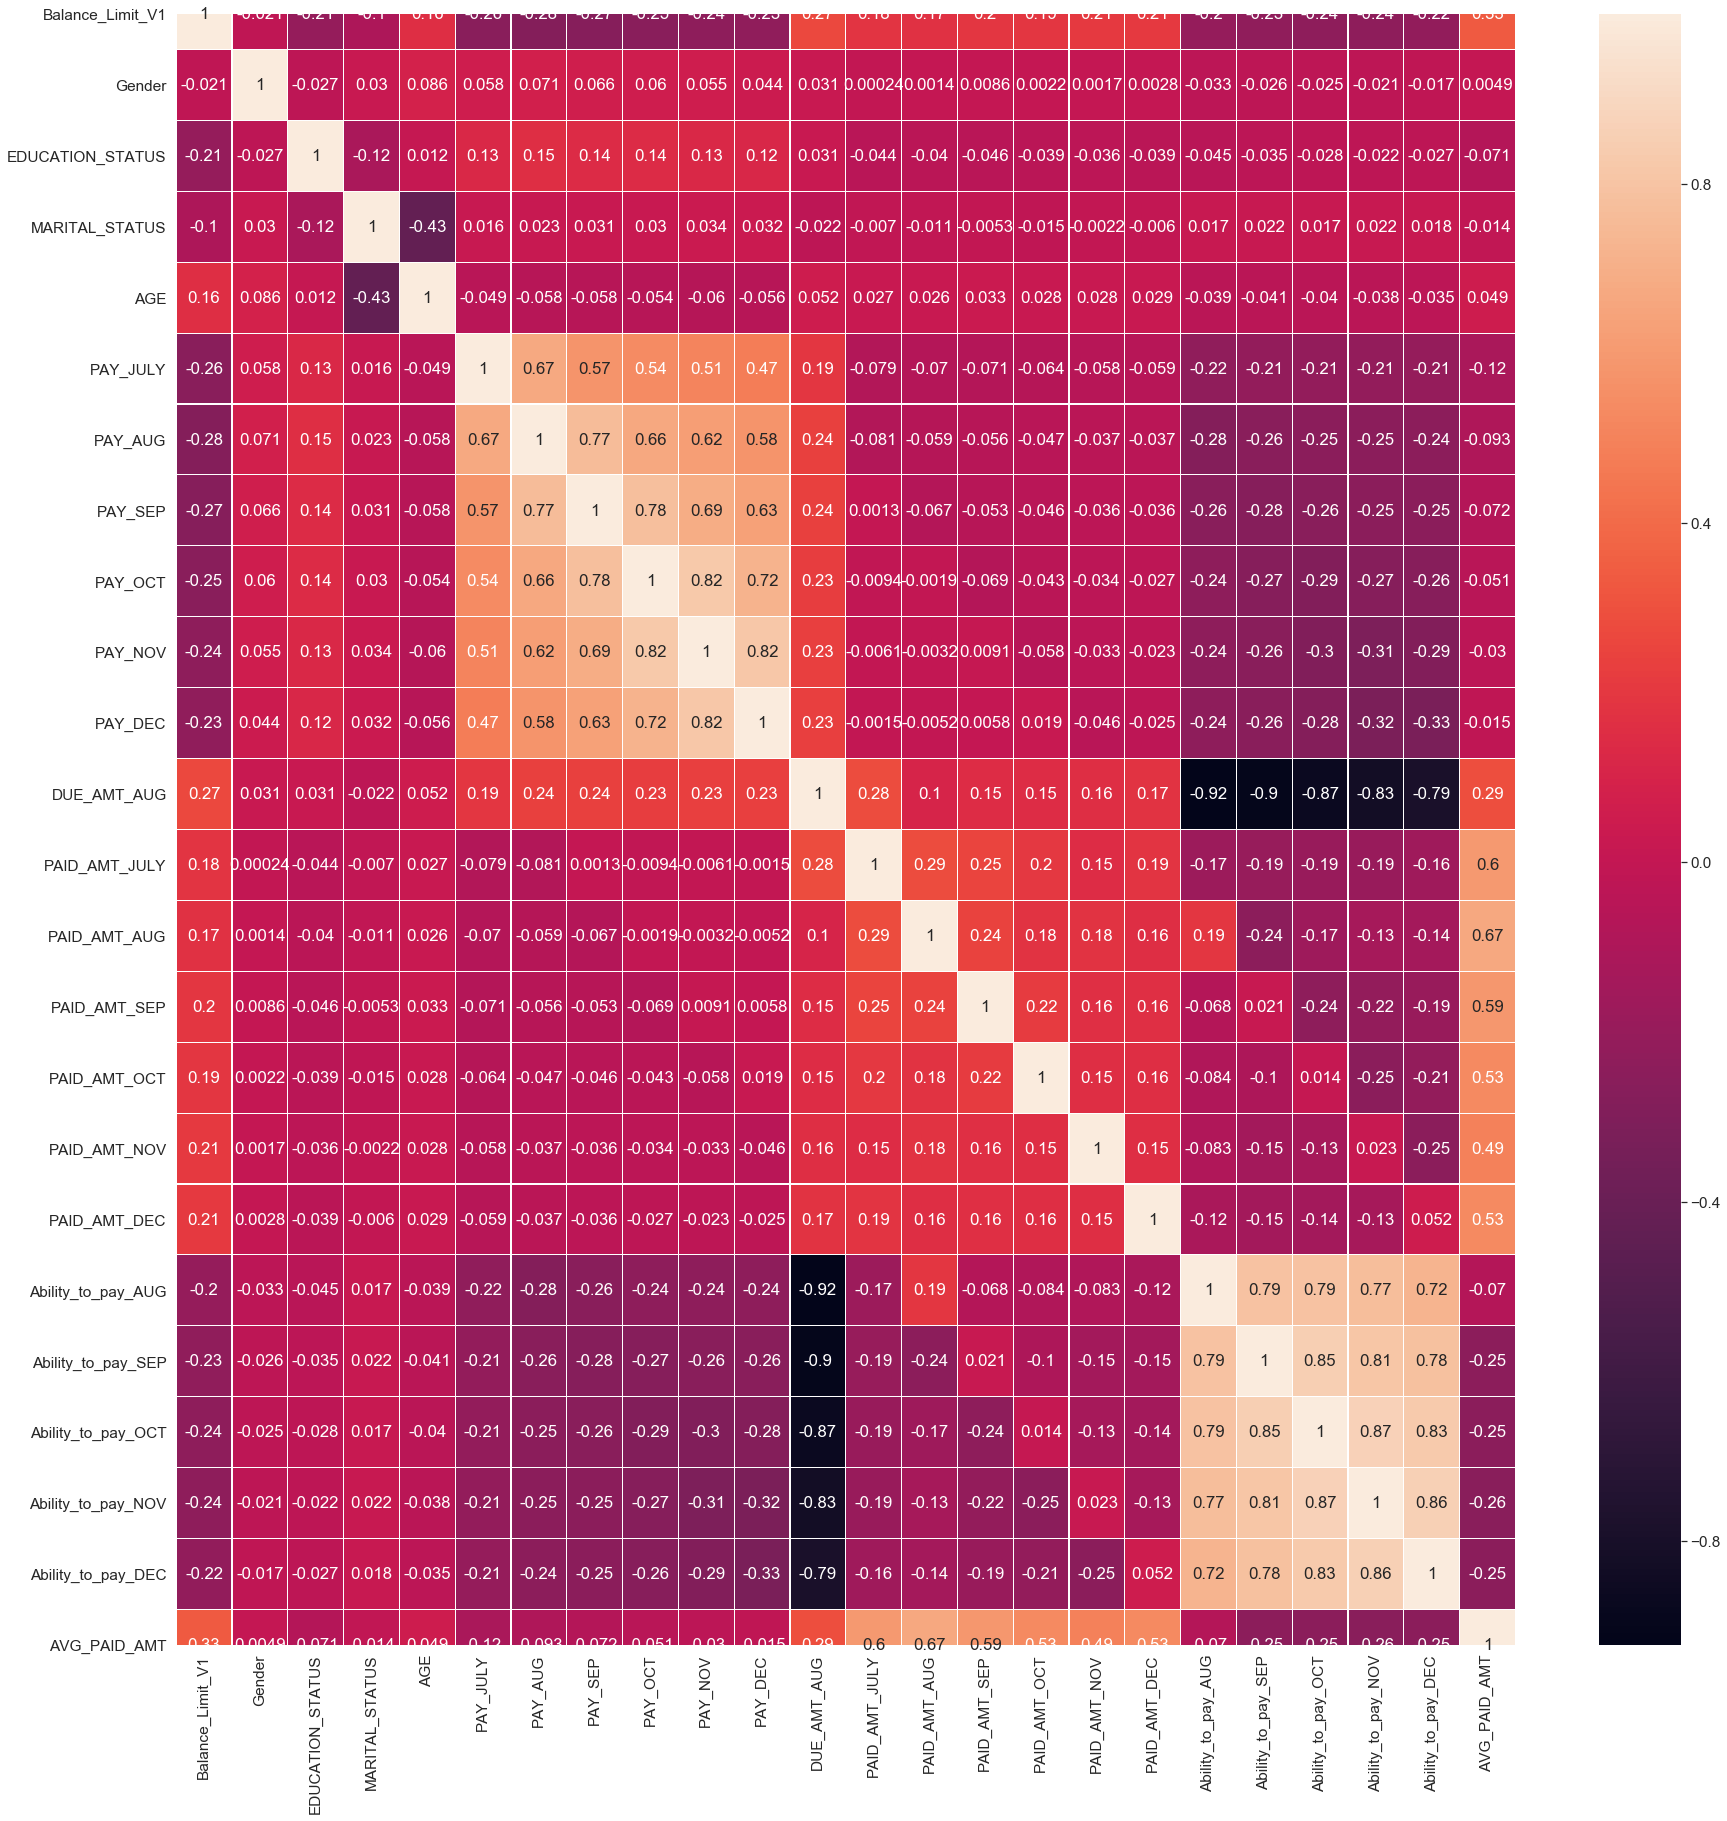

In [15]:
corr_heatmap(data_comp)

In [16]:
data_comp.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,...,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Ability_to_pay_AUG,Ability_to_pay_SEP,Ability_to_pay_OCT,Ability_to_pay_NOV,Ability_to_pay_DEC,AVG_PAID_AMT
Client_ID,,,,,,,,,,,,,,,,,,,,,
A2,1000000,0,0,1,1,-1,-1,-1,-1,-1,...,39418,162772,0,538165,2615,33414,123354,-162772,552147,124966.000000
A3,1000000,1,1,1,0,0,-1,-1,-1,-1,...,43530,80811,942,33666,-105618,16582,37281,-79869,-124590,59494.500000
A4,100000,1,1,0,1,4,3,2,2,-2,...,0,0,0,0,-16082,-15477,0,0,0,0.000000
A5,200000,1,0,0,1,2,0,0,0,0,...,3696,4620,4049,3918,-92848,-95193,-97309,-100353,-102740,4004.666667
A6,1000000,1,0,1,1,2,2,0,0,0,...,16170,17325,16401,17325,-461046,-429785,-435354,-445271,-453899,14668.500000


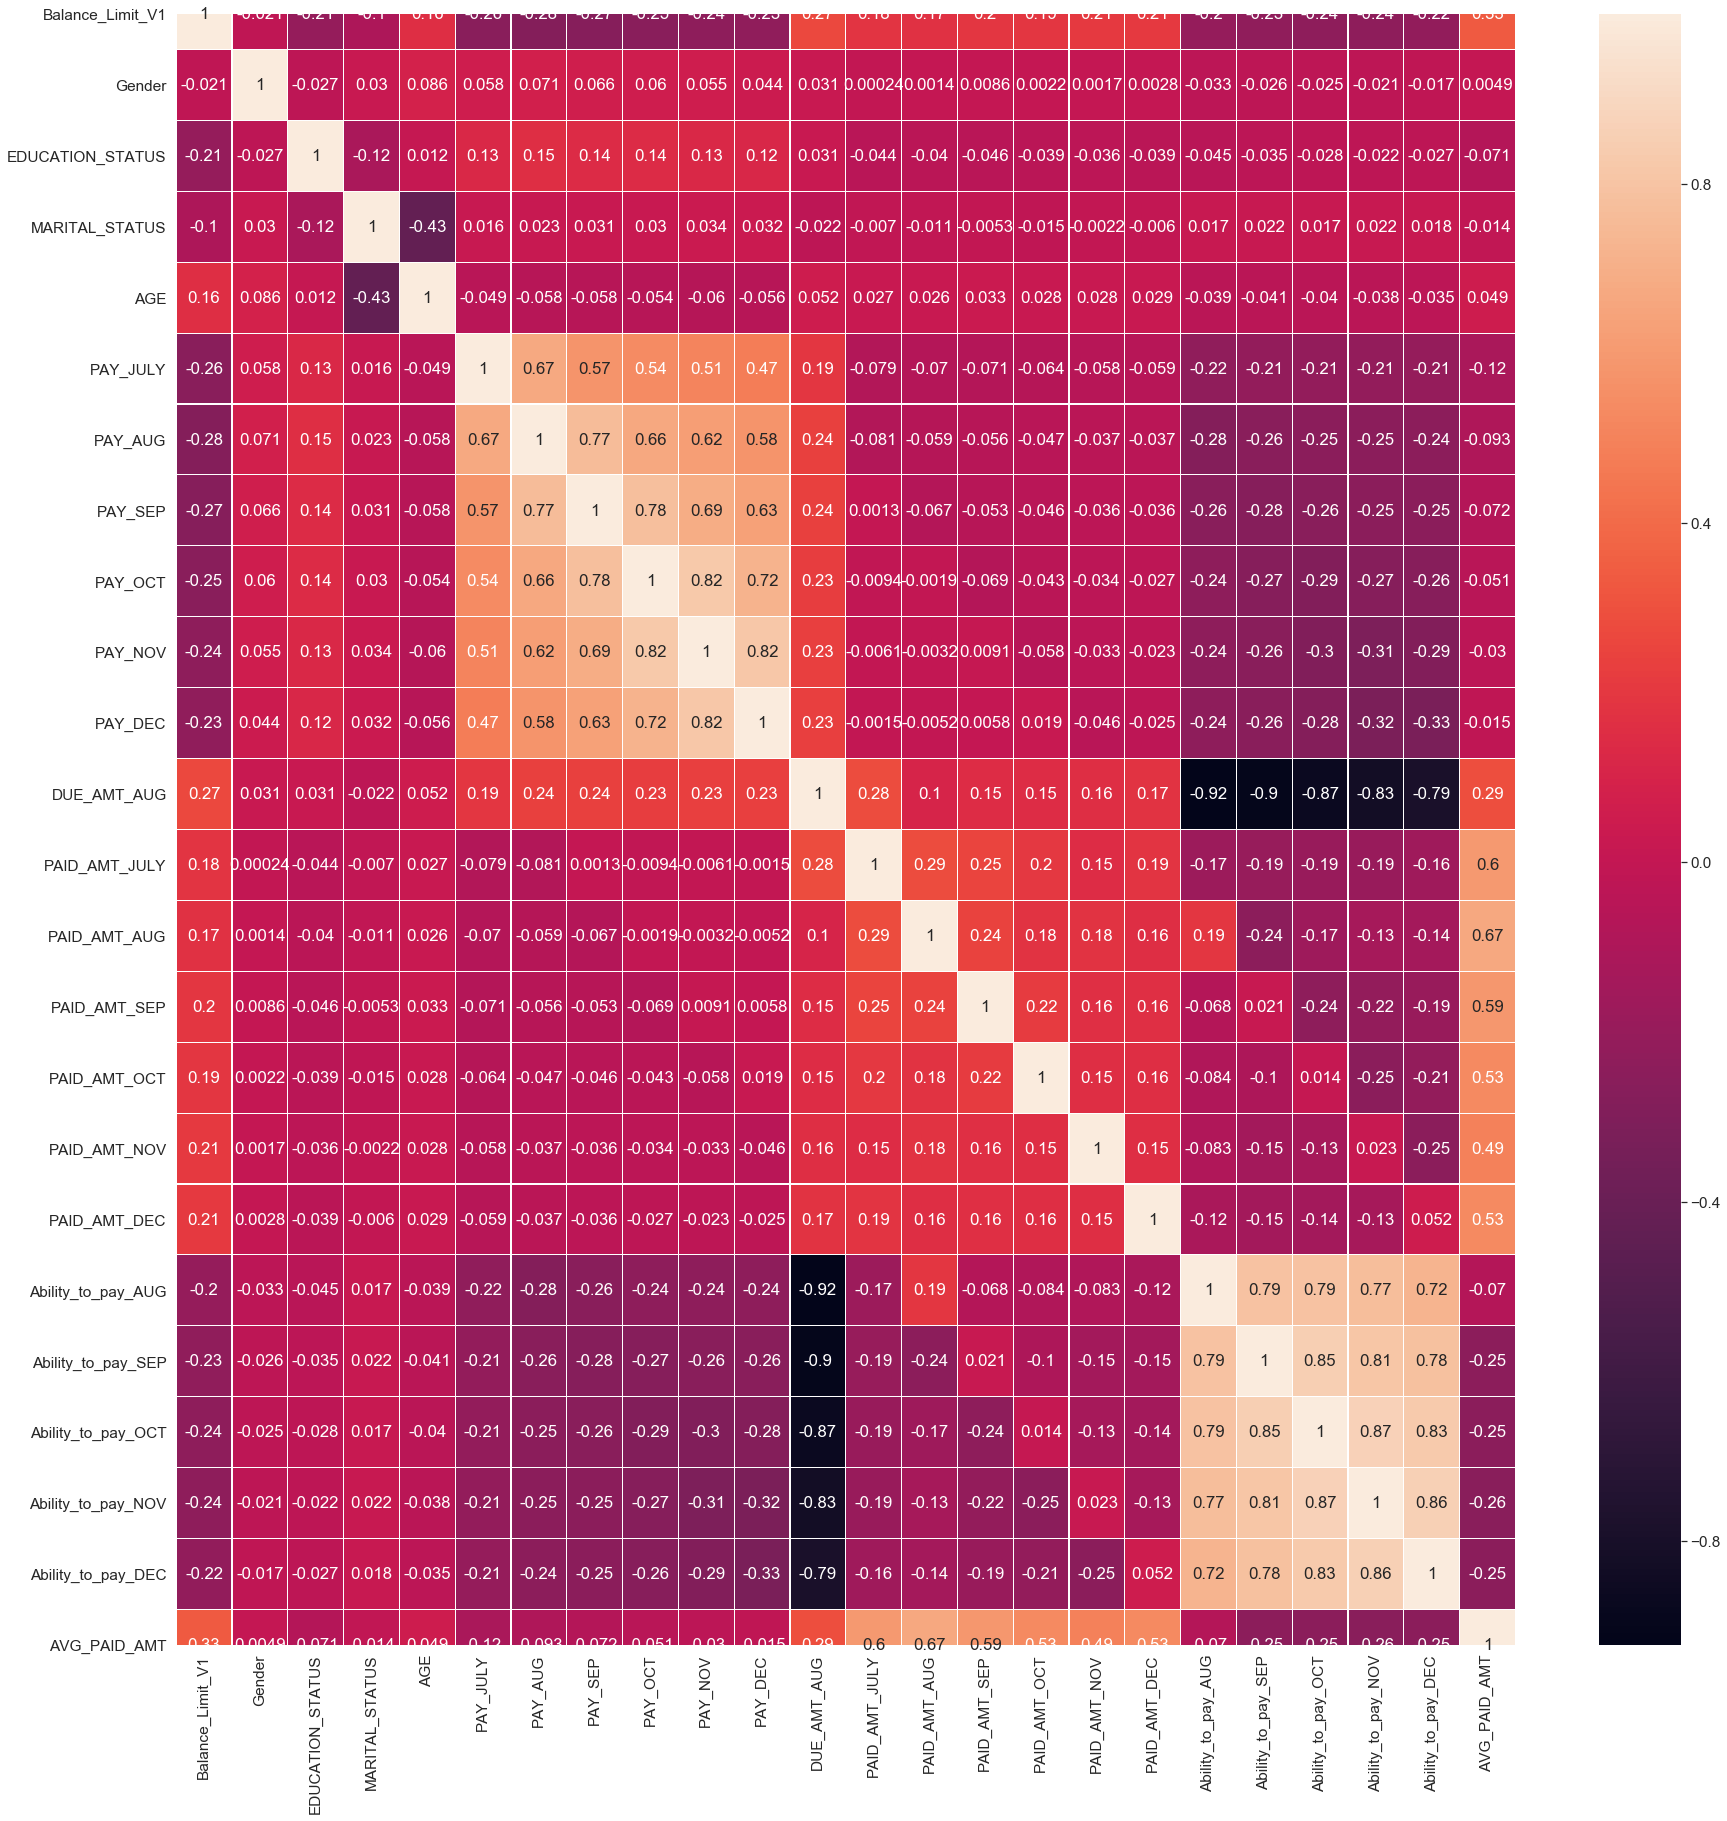

In [17]:
corr_heatmap(data_comp)

In [18]:
training_x_modified_fe = data_comp.iloc[:len(training_x)]
test_data_modified_fe = data_comp.iloc[len(training_x):]
training_x_modified_fe["NEXT_MONTH_DEFAULT"] = training_data["NEXT_MONTH_DEFAULT"]

C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
training_x_modified_fe.to_csv("training_data_modified_fe.csv")
test_data_modified_fe.to_csv("test_data_modified_fe.csv")